In [1]:
import numpy as np
import math
import Bio
import matplotlib.pyplot as plt

In [2]:
score_matrix = np.array([[-math.inf, -1, -1, -1, -1],
                         [-1, 1, -1, -1, -1],
                         [-1, -1, 1, -1, -1],
                         [-1, -1, -1, 1, -1],
                         [-1, -1, -1, -1, 1]])

def smtx(a,b):
    if a == "-":
        if b == "-":
            return -math.inf
        return -0.5
    if a == b:
        return 1
    if b == "-":
        return -0.5
    else:
        return 0

testo = "GCATGCA"
testt = "GATTACA"

In [3]:
def NWA(seqa,seqb,fact):
    grid = np.zeros((len(seqa)+1,len(seqb)+1))
    bgrid = np.zeros((len(seqa)+1,len(seqb)+1),"U1")
    srow = []
    for i in range(len(seqb)+1):
        srow.append(0-fact*i)
    for i in range(len(seqa)+1):
        grid[i][0] = 0-fact*i
    grid[0] = srow
    midgrid = grid[1:,1:]
    for x in range(1,len(seqa)+1):
        for y in range(1,len(seqb)+1):
            bestcand = [(grid[x-1][y-1]+smtx(seqa[x-1],seqb[y-1])),
                             (grid[x-1][y]+smtx(seqa[x-1],"-")),
                             (grid[x][y-1]+smtx("-",seqb[y-1]))]
            grid[x][y] = max(bestcand)
            if max(bestcand)==bestcand[0]:
                bgrid[x][y] = "d"
            elif max(bestcand)==bestcand[1]:
                bgrid[x][y] = "u"
            else:
                bgrid[x][y] = "l"
    print(grid)
    print(bgrid)
    
    return grid, bgrid

In [4]:
def optPath(mtx, mtxdir, wrd1, wrd2):
    outgrid = np.zeros(mtx.shape)
    reverse = []
    char1 = len(wrd1)-1
    char2 = len(wrd2)-1
    #print(char1,char2)
    #print(wrd1[char1],wrd2[char2])
    x = mtx.shape[0]-1
    y = mtx.shape[1]-1
    #left = mtx[x][y-1]
    #up = mtx[x-1][y]
    #diag = mtx[x-1][y-1]
    #if diag>=up and diag>=left:
    #    reverse.append([wrd1[char1],wrd2[char2]])
    #    char1 = char1-1
    #    char2 = char2-1
    #elif up>=left:
        
    while not(x==0 and y==0):
        left = mtx[x][y-1]
        up = mtx[x-1][y]
        diag = mtx[x-1][y-1]
        #print(y,x)
        #print(up,left,diag)
        outgrid[x][y] = 1
        if mtxdir[x][y]=="d":
            x=x-1
            y=y-1
            reverse.append([wrd1[char1],wrd2[char2]])
            char1 = char1-1
            char2 = char2-1
        elif mtxdir[x][y]=="u":
            x=x-1
            reverse.append(["-",wrd2[char2]])
            char2 = char2-1
        else:
            y=y-1
            reverse.append([wrd1[char1],"-"])
            char1 = char1-1
    #print(reverse)
    return reverse, outgrid

In [ ]:
actual1 = "CAAAGACCTGAAGAGCCAGTGGACTCCACCCCACTTTCTGGTCTGACCAATT"
actual2 = "ACCACACTCTCTGGGCTGACCAATTACAGCGCTTCTACAGAACTGAAGACTCC"

grid, bgrid = NWA(actual1,actual2,0.5)

In [ ]:
rawpath, outgrid = optPath(grid,bgrid,actual2,actual1)
plt.imshow(outgrid)

In [ ]:
rawpath = np.array(rawpath)
patha = rawpath[:,0]
pathb = rawpath[:,1]
#print(patha)
#print(pathb)
patha = patha[::-1]
pathb = pathb[::-1]
stra = ""
strb = ""
for a in patha:
    stra = stra+a
print(stra)
for b in pathb:
    strb = strb+b
print(strb)

[[  0.   -0.5  -1.  ... -25.5 -26.  -26.5]
 [ -0.5   0.    0.5 ... -24.  -24.5 -25. ]
 [ -1.    0.5   0.  ... -22.5 -23.  -23.5]
 ...
 [-25.  -23.5 -22.  ...  21.5  21.   20.5]
 [-25.5 -24.  -22.5 ...  23.   22.5  22. ]
 [-26.  -24.5 -23.  ...  22.5  23.   22.5]]
[['' '' '' ... '' '' '']
 ['' 'd' 'd' ... 'l' 'd' 'd']
 ['' 'd' 'd' ... 'l' 'l' 'l']
 ...
 ['' 'd' 'u' ... 'd' 'd' 'd']
 ['' 'u' 'u' ... 'd' 'l' 'l']
 ['' 'u' 'u' ... 'd' 'd' 'd']]


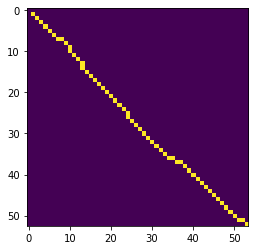

In [6]:
rawpath, outgrid = optPath(grid,bgrid,actual2,actual1)
plt.imshow(outgrid)

In [7]:
rawpath = np.array(rawpath)
patha = rawpath[:,0]
pathb = rawpath[:,1]
#print(patha)
#print(pathb)
patha = patha[::-1]
pathb = pathb[::-1]
stra = ""
strb = ""
for a in patha:
    stra = stra+a
print(stra)
for b in pathb:
    strb = strb+b
print(strb)

ACCACACTCT-CTG-GGCTGACCAAT-TACAGCGCTTCTACAGAACTGAAGACTCC
CAAAGAC-CTGAAGAGCCAGTGGACTCCACCCCACTT-T-CTGGTCTGACCAAT-T
